In [1]:
import cv2
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import layers
tensorflow.__version__

'2.12.0'

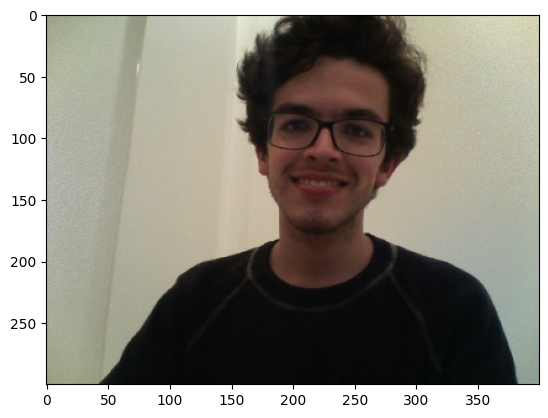

In [3]:
imagem = cv2.imread('C:/Users/kaiqu/lamia-bootcamp/CARD 22/Material/testes/teste_gabriel.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

In [4]:
cascade_faces = 'C:/Users/kaiqu/lamia-bootcamp/CARD 22/Material/haarcascade_frontalface_default.xml'
caminho_modelo = 'C:/Users/kaiqu/lamia-bootcamp/CARD 22/Material/modelo_01_expressoes.h5'
face_detection = cv2.CascadeClassifier(cascade_faces) # detecção de faces

classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]


In [5]:
original = imagem.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20, 20)) # detectou a posição dos pixeis da face
faces

array([[163,  41, 124, 124]])

In [6]:
imagem.shape # rgb

(300, 400, 3)

In [7]:
len(faces)

1

In [8]:
faces.shape

(1, 4)

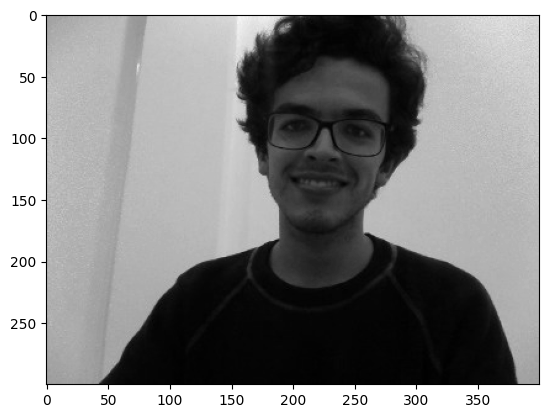

In [9]:
# extração do roi region of interest
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
plt.imshow(cinza, cmap='gray')

In [10]:
cinza.shape

(300, 400)

In [11]:
roi = cinza[40:40 + 128, 162:162 + 128] # 40y 162x

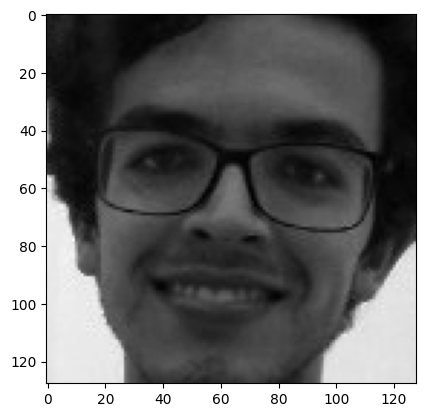

In [12]:
plt.imshow(roi, cmap='gray')

In [13]:
roi.shape

(128, 128)

In [14]:
roi

array([[ 37,  35,  26, ...,  23,  27,  32],
       [ 32,  30,  23, ...,  22,  22,  27],
       [ 29,  31,  28, ...,  21,  20,  24],
       ...,
       [177, 178, 179, ..., 175, 176, 176],
       [177, 178, 179, ..., 174, 176, 175],
       [177, 178, 180, ..., 175, 176, 175]], dtype=uint8)

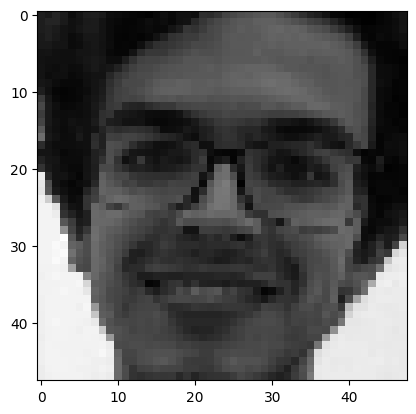

In [15]:
# redimensionar
roi = cv2.resize(roi, (48, 48)) # diminui os pixeis para a eficiência do modelo
plt.imshow(roi, cmap='gray')

In [16]:
roi.dtype

dtype('uint8')

In [17]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [18]:
roi

array([[ 31.,  27.,  36., ...,  15.,  20.,  24.],
       [ 30.,  35.,  35., ...,  15.,  18.,  23.],
       [ 30.,  33.,  29., ...,  16.,  19.,  24.],
       ...,
       [180., 183., 183., ..., 176., 177., 175.],
       [178., 182., 183., ..., 175., 176., 175.],
       [178., 181., 182., ..., 174., 175., 176.]])

In [19]:
roi = roi / 255
roi

array([[0.12156863, 0.10588235, 0.14117647, ..., 0.05882353, 0.07843137,
        0.09411765],
       [0.11764706, 0.1372549 , 0.1372549 , ..., 0.05882353, 0.07058824,
        0.09019608],
       [0.11764706, 0.12941176, 0.11372549, ..., 0.0627451 , 0.0745098 ,
        0.09411765],
       ...,
       [0.70588235, 0.71764706, 0.71764706, ..., 0.69019608, 0.69411765,
        0.68627451],
       [0.69803922, 0.71372549, 0.71764706, ..., 0.68627451, 0.69019608,
        0.68627451],
       [0.69803922, 0.70980392, 0.71372549, ..., 0.68235294, 0.68627451,
        0.69019608]])

In [20]:
roi = img_to_array(roi) # 3d
roi

array([[[0.12156863],
        [0.10588235],
        [0.14117648],
        ...,
        [0.05882353],
        [0.07843138],
        [0.09411765]],

       [[0.11764706],
        [0.13725491],
        [0.13725491],
        ...,
        [0.05882353],
        [0.07058824],
        [0.09019608]],

       [[0.11764706],
        [0.12941177],
        [0.11372549],
        ...,
        [0.0627451 ],
        [0.07450981],
        [0.09411765]],

       ...,

       [[0.7058824 ],
        [0.7176471 ],
        [0.7176471 ],
        ...,
        [0.6901961 ],
        [0.69411767],
        [0.6862745 ]],

       [[0.69803923],
        [0.7137255 ],
        [0.7176471 ],
        ...,
        [0.6862745 ],
        [0.6901961 ],
        [0.6862745 ]],

       [[0.69803923],
        [0.70980394],
        [0.7137255 ],
        ...,
        [0.68235296],
        [0.6862745 ],
        [0.6901961 ]]], dtype=float32)

In [21]:
roi.shape # 3d

(48, 48, 1)

In [22]:
roi = np.expand_dims(roi, axis = 0) # 4d ---> squeeze pra diminuir
roi.shape

(1, 48, 48, 1)

In [23]:
# previsoes
preds = classificador_emocoes.predict(roi)[0]

1/1 [==============================] - 0s 215ms/step


In [24]:
preds

array([1.7134083e-05, 5.9817618e-09, 1.1286500e-05, 9.9059230e-01,
       1.8253666e-05, 1.8541772e-05, 9.3424423e-03], dtype=float32)

In [25]:
len(preds)

7

In [26]:
emotion_probability = np.max(preds)
emotion_probability

0.9905923

In [27]:
preds.argmax()

3

In [28]:
label = expressoes[preds.argmax()]
label

'Feliz'

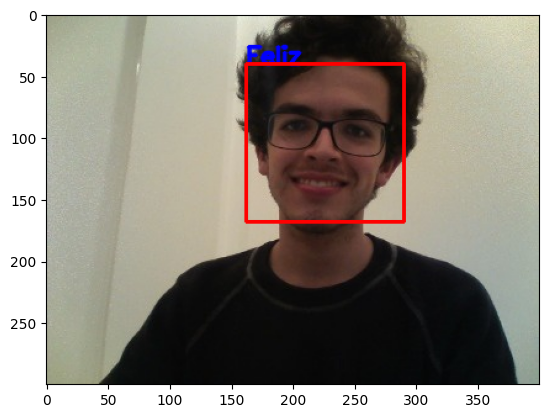

In [29]:
# resultados
cv2.putText(original, label, (162, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (255, 0, 0), 2)
plt.imshow(original)

In [32]:
probabilidades = np.ones((250, 300, 3), dtype='uint8') * 255
probabilidades

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [33]:
probabilidades.shape

(250, 300, 3)

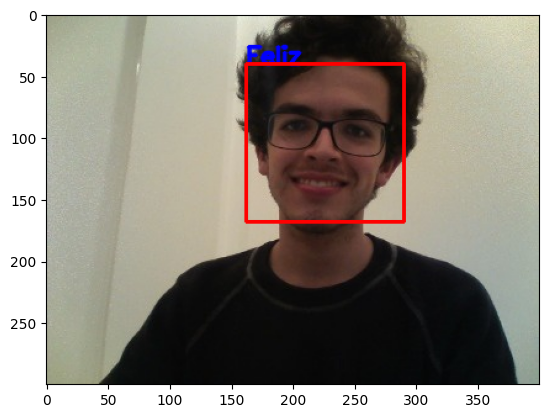

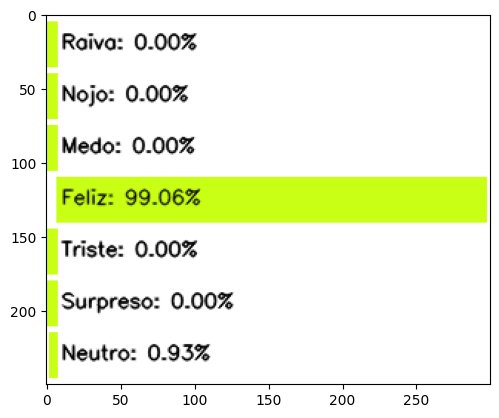

In [41]:
plt.imshow(original)
plt.show()
if len(faces) == 1:
    for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
        # print(i, emotion, prob)
        text = '{}: {:.2f}%'.format(emotion, prob * 100)
        w = int(prob * 300)
        cv2.rectangle(probabilidades, (7, (i * 35) + 5),
                      (w, (i * 35) + 35), (200, 255, 20), -1)
        cv2.putText(probabilidades, text, (10, (i * 35) + 23),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
        
plt.imshow(probabilidades)